In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import defaultdict
from tqdm.auto import tqdm
from sklearn.linear_model import LinearRegression
from lmfit.models import LinearModel

/om2/user/ericjm/miniconda3/envs/phys/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
results = defaultdict(list)
for i in tqdm(range(1, 54+1)):
    try:
        with open(f"/om/user/ericjm/results/class/8.316/final/train-0/{i}/config.json") as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/class/8.316/final/train-0/{i}/info.json") as f:
            info = json.load(f)
        seed, size = config['seed'], config['size']
        loss = min(info['test_losses'])
        results[size].append(loss)
    except Exception as e:
        print(e)

100%|██████████| 54/54 [00:00<00:00, 422.74it/s]

[Errno 2] No such file or directory: '/om/user/ericjm/results/class/8.316/final/train-0/49/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/class/8.316/final/train-0/51/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/class/8.316/final/train-0/52/info.json'
'test_losses'


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 42
    # variables        = 2
    chi-square         = 0.20808475
    reduced chi-square = 0.00520212
    Akaike info crit   = -218.914138
    Bayesian info crit = -215.438798
    R-squared          = 0.98836077
[[Variables]]
    slope:     -0.93493665 +/- 0.01604192 (1.72%) (init = -0.9349367)
    intercept:  0.47938168 +/- 0.04086741 (8.53%) (init = 0.4793817)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9622
Standard error of the slope: 0.016041924950537644


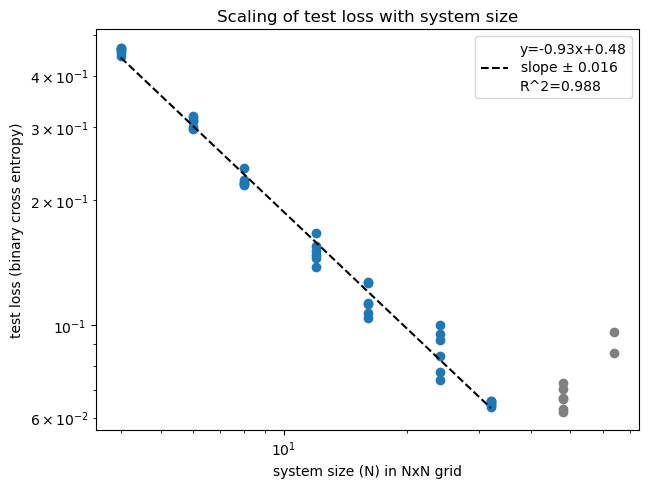

In [25]:
sizes = np.array(sorted(results.keys())).flatten()
for size in sizes[:7]:
    losses = np.array(results[size])
    plt.scatter(size*np.ones(len(losses)), losses, color='C0')
for size in sizes[7:]:
    losses = np.array(results[size])
    plt.scatter(size*np.ones(len(losses)), losses, color='grey')

# perform linear regression on
X = []
y = []
for size in sizes[:7]:
    for loss in results[size]:
        X.append(size)
        y.append(loss)
# Convert X and y to numpy arrays, but now keep them as 1D arrays
X = np.array(X)
y = np.array(y)

# Fit a model with lmfit
mod = LinearModel()
pars = mod.guess(np.log(y), x=np.log(X))

out = mod.fit(np.log(y), pars, x=np.log(X))

# Print the fit report
print(out.fit_report())

# Access standard errors
print(f"Standard error of the slope: {out.params['slope'].stderr}")

# Continue with your sklearn regression...
X = X.reshape(-1, 1)  # Reshape X back to 2D for sklearn
reg = LinearRegression().fit(np.log(X), np.log(y))
xs = sizes[:7].reshape(-1, 1)
ys = np.exp(reg.predict(np.log(xs)))
plt.plot(xs, ys, color='black', linestyle='dashed',
         label=f"y={reg.coef_[0]:.2f}x+{reg.intercept_:.2f}\nslope $\pm$ {0.016}\nR^2={0.988}")


# print uncertainty of regression

plt.yscale('log')
plt.xscale('log')
plt.xlabel('system size (N) in NxN grid')
plt.ylabel('test loss (binary cross entropy)')
plt.title('Scaling of test loss with system size')
plt.legend()
plt.tight_layout(pad=0.4)
plt.savefig('../figures/scaling-sizes-losses.pdf')

100%|██████████| 54/54 [00:00<00:00, 516.62it/s]


[Errno 2] No such file or directory: '/om/user/ericjm/results/class/8.316/final/train-0/49/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/class/8.316/final/train-0/51/info.json'
[Errno 2] No such file or directory: '/om/user/ericjm/results/class/8.316/final/train-0/52/info.json'
'train_accuracies'


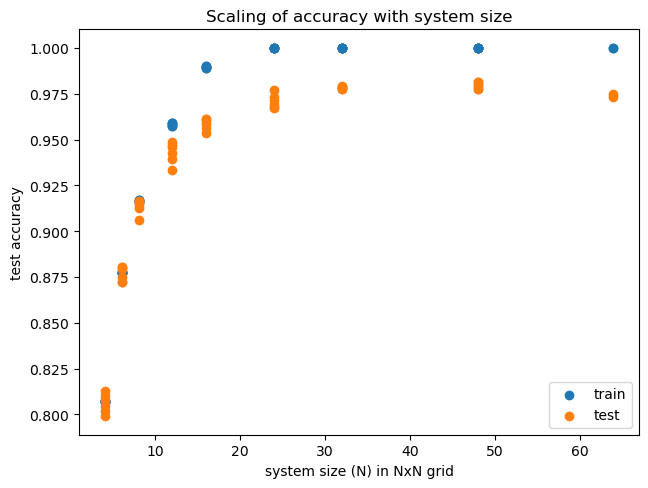

In [4]:
# let's plot accuracy vs system size
results_train = defaultdict(list)
results_test = defaultdict(list)
for i in tqdm(range(1, 54+1)):
    try:
        with open(f"/om/user/ericjm/results/class/8.316/final/train-0/{i}/config.json") as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/class/8.316/final/train-0/{i}/info.json") as f:
            info = json.load(f)
        seed, size = config['seed'], config['size']
        acc_train = max(info['train_accuracies'])
        results_train[size].append(acc_train)
        acc_test = max(info['test_accuracies'])
        results_test[size].append(acc_test)
    except Exception as e:
        print(e)

sizes = np.array(sorted(results.keys())).flatten()
for size in sizes:
    accs_train = np.array(results_train[size])
    plt.scatter(size*np.ones(len(accs_train)), accs_train, color='C0', label='train' if size == 4 else None)
    accs_test = np.array(results_test[size])
    plt.scatter(size*np.ones(len(accs_test)), accs_test, color='C1', label='test' if size == 4 else None)

plt.xlabel('system size (N) in NxN grid')
plt.ylabel('test accuracy')
plt.title("Scaling of accuracy with system size")
plt.legend(loc='lower right')
plt.tight_layout(pad=0.4)
plt.savefig('../figures/scaling-sizes-accuracies.pdf')

In [3]:
results = defaultdict(list)
for i in tqdm(range(1, 60+1)):
    try:
        with open(f"/om/user/ericjm/results/class/8.316/final/train-1/{i}/config.json") as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/class/8.316/final/train-1/{i}/info.json") as f:
            info = json.load(f)
        seed, size = config['seed'], config['size']
        P = info['P']
        loss = min(info['test_losses'])
        results[P].append(loss)
    except Exception as e:
        print(e)

100%|██████████| 60/60 [00:00<00:00, 490.68it/s]


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 54
    # variables        = 2
    chi-square         = 0.43329145
    reduced chi-square = 0.00833253
    Akaike info crit   = -256.567751
    Bayesian info crit = -252.589783
    R-squared          = 0.62231840
[[Variables]]
    slope:     -0.07921752 +/- 0.00855808 (10.80%) (init = -0.07921752)
    intercept: -1.75569416 +/- 0.09666403 (5.51%) (init = -1.755694)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9917
Standard error of the slope: 0.008558076083688438


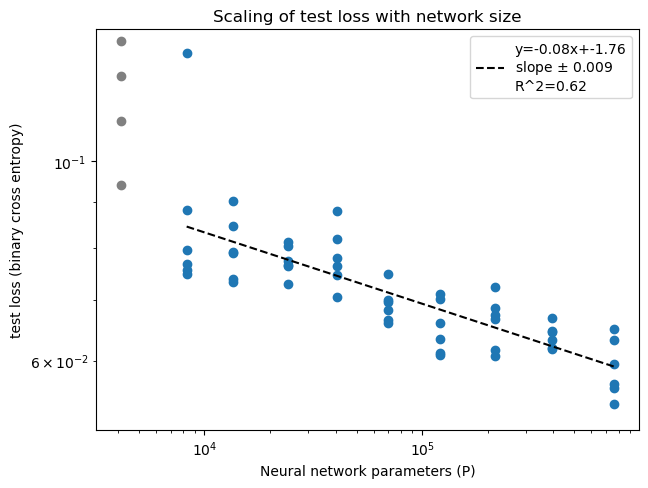

In [15]:
Ps = np.array(sorted(results.keys())).flatten()
for P in Ps[:1]:
    losses = np.array(results[P])
    plt.scatter(P*np.ones(len(losses)), losses, color='grey')
for P in Ps[1:]:
    losses = np.array(results[P])
    plt.scatter(P*np.ones(len(losses)), losses, color='C0')

# # perform linear regression on
X = []
y = []
for P in Ps[1:]:
    for loss in results[P]:
        X.append(P)
        y.append(loss)
# Convert X and y to numpy arrays, but now keep them as 1D arrays
X = np.array(X)
y = np.array(y)

# Fit a model with lmfit
mod = LinearModel()
pars = mod.guess(np.log(y), x=np.log(X))

out = mod.fit(np.log(y), pars, x=np.log(X))

# Print the fit report
print(out.fit_report())

# Access standard errors
print(f"Standard error of the slope: {out.params['slope'].stderr}")

# Continue with your sklearn regression...
X = X.reshape(-1, 1)  # Reshape X back to 2D for sklearn
reg = LinearRegression().fit(np.log(X), np.log(y))
xs = Ps[1:].reshape(-1, 1)
ys = np.exp(reg.predict(np.log(xs)))
plt.plot(xs, ys, color='black', linestyle='dashed',
         label=f"y={reg.coef_[0]:.2f}x+{reg.intercept_:.2f}\nslope $\pm$ {0.009}\nR^2={0.62}")


# print uncertainty of regression

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Neural network parameters (P)')
plt.ylabel('test loss (binary cross entropy)')
plt.ylim(None, 0.14)
plt.title('Scaling of test loss with network size')
plt.legend()
plt.tight_layout(pad=0.4)
plt.savefig('../figures/scaling-parameters-losses.pdf')

100%|██████████| 60/60 [00:00<00:00, 411.62it/s]


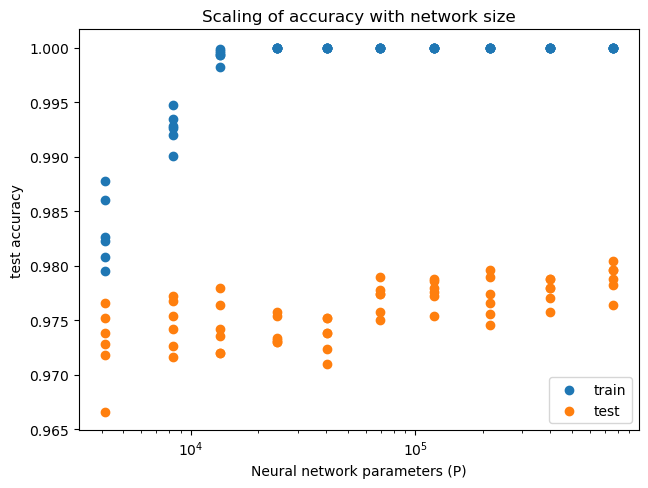

In [22]:
# let's plot accuracy vs system size
results_train = defaultdict(list)
results_test = defaultdict(list)
for i in tqdm(range(1, 60+1)):
    try:
        with open(f"/om/user/ericjm/results/class/8.316/final/train-1/{i}/config.json") as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/class/8.316/final/train-1/{i}/info.json") as f:
            info = json.load(f)
        seed, size = config['seed'], config['size']
        P = info['P']
        acc_train = max(info['train_accuracies'])
        results_train[P].append(acc_train)
        acc_test = max(info['test_accuracies'])
        results_test[P].append(acc_test)
    except Exception as e:
        print(e)

Ps = np.array(sorted(results_train.keys())).flatten()
for P in Ps:
    accs_train = np.array(results_train[P])
    plt.scatter(P*np.ones(len(accs_train)), accs_train, color='C0', label='train' if P == Ps[0] else None)
    accs_test = np.array(results_test[P])
    plt.scatter(P*np.ones(len(accs_test)), accs_test, color='C1', label='test' if P == Ps[0] else None)

plt.xlabel('Neural network parameters (P)')
plt.ylabel('test accuracy')
plt.xscale('log')
plt.title("Scaling of accuracy with network size")
plt.legend(loc='lower right')
plt.tight_layout(pad=0.4)
plt.savefig('../figures/scaling-parameters-accuracies.pdf')

100%|██████████| 90/90 [00:00<00:00, 354.90it/s]


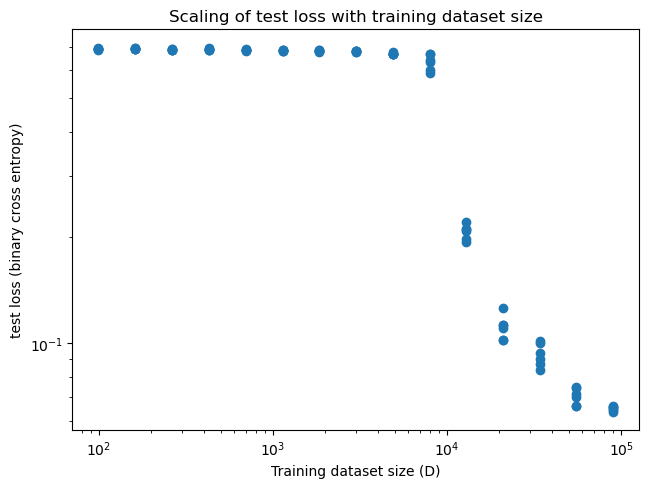

In [33]:
results = defaultdict(list)
for i in tqdm(range(1, 90+1)):
    try:
        with open(f"/om/user/ericjm/results/class/8.316/final/train-2/{i}/config.json") as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/class/8.316/final/train-2/{i}/info.json") as f:
            info = json.load(f)
        seed, size = config['seed'], config['size']
        D = config['D']
        loss = min(info['test_losses'])
        results[D].append(loss)
    except Exception as e:
        print(e)
    
Ds = np.array(sorted(results.keys())).flatten()
for D in Ds:
    losses = np.array(results[D])
    plt.scatter(D*np.ones(len(losses)), losses, color='C0')
# for D in Ps[:1]:
#     losses = np.array(results[P])
#     plt.scatter(P*np.ones(len(losses)), losses, color='grey')
# for P in Ps[1:]:
#     losses = np.array(results[P])
#     plt.scatter(P*np.ones(len(losses)), losses, color='C0')

# # perform linear regression on
# X = []
# y = []
# for P in Ps[1:]:
#     for loss in results[P]:
#         X.append(P)
#         y.append(loss)
# # Convert X and y to numpy arrays, but now keep them as 1D arrays
# X = np.array(X)
# y = np.array(y)

# # Fit a model with lmfit
# mod = LinearModel()
# pars = mod.guess(np.log(y), x=np.log(X))

# out = mod.fit(np.log(y), pars, x=np.log(X))

# # Print the fit report
# print(out.fit_report())

# # Access standard errors
# print(f"Standard error of the slope: {out.params['slope'].stderr}")

# # Continue with your sklearn regression...
# X = X.reshape(-1, 1)  # Reshape X back to 2D for sklearn
# reg = LinearRegression().fit(np.log(X), np.log(y))
# xs = Ps[1:].reshape(-1, 1)
# ys = np.exp(reg.predict(np.log(xs)))
# plt.plot(xs, ys, color='black', linestyle='dashed',
#          label=f"y={reg.coef_[0]:.2f}x+{reg.intercept_:.2f}\nslope $\pm$ {0.009}\nR^2={0.62}")


# # print uncertainty of regression

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Training dataset size (D)')
plt.ylabel('test loss (binary cross entropy)')
# plt.ylim(None, 0.14)
plt.title('Scaling of test loss with training dataset size')
# plt.legend()
plt.tight_layout(pad=0.4)
plt.savefig('../figures/scaling-data-losses.pdf')

100%|██████████| 90/90 [00:00<00:00, 484.64it/s]


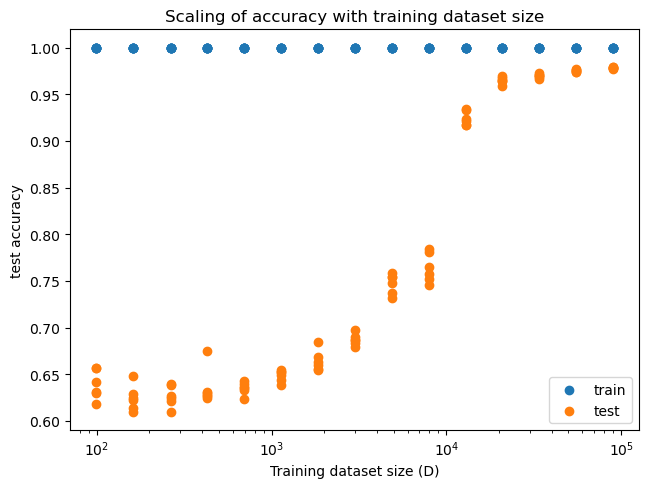

In [40]:
# let's plot accuracy vs system size
results_train = defaultdict(list)
results_test = defaultdict(list)
for i in tqdm(range(1, 90+1)):
    try:
        with open(f"/om/user/ericjm/results/class/8.316/final/train-2/{i}/config.json") as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/class/8.316/final/train-2/{i}/info.json") as f:
            info = json.load(f)
        seed, size = config['seed'], config['size']
        D = config['D']
        acc_train = max(info['train_accuracies'])
        results_train[D].append(acc_train)
        acc_test = max(info['test_accuracies'])
        results_test[D].append(acc_test)
    except Exception as e:
        print(e)

Ds = np.array(sorted(results_train.keys())).flatten()
for D in Ds:
    accs_train = np.array(results_train[D])
    plt.scatter(D*np.ones(len(accs_train)), accs_train, color='C0', label='train' if D == Ds[0] else None)
    accs_test = np.array(results_test[D])
    plt.scatter(D*np.ones(len(accs_test)), accs_test, color='C1', label='test' if D == Ds[0] else None)

plt.xlabel('Training dataset size (D)')
plt.ylabel('test accuracy')
plt.xscale('log')
plt.title("Scaling of accuracy with training dataset size")
plt.legend(loc='lower right')
plt.tight_layout(pad=0.4)
plt.savefig('../figures/scaling-data-accuracies.pdf')

100%|██████████| 90/90 [00:00<00:00, 511.69it/s]


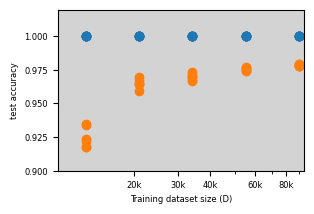

In [61]:
# let's plot accuracy vs system size
results_train = defaultdict(list)
results_test = defaultdict(list)
for i in tqdm(range(1, 90+1)):
    try:
        with open(f"/om/user/ericjm/results/class/8.316/final/train-2/{i}/config.json") as f:
            config = json.load(f)
        with open(f"/om/user/ericjm/results/class/8.316/final/train-2/{i}/info.json") as f:
            info = json.load(f)
        seed, size = config['seed'], config['size']
        D = config['D']
        acc_train = max(info['train_accuracies'])
        results_train[D].append(acc_train)
        acc_test = max(info['test_accuracies'])
        results_test[D].append(acc_test)
    except Exception as e:
        print(e)

# add background color to plot
plt.figure(figsize=(3, 2))
Ds = np.array(sorted(results_train.keys())).flatten()
for D in Ds:
    accs_train = np.array(results_train[D])
    plt.scatter(D*np.ones(len(accs_train)), accs_train, color='C0', label='train' if D == Ds[0] else None)
    accs_test = np.array(results_test[D])
    plt.scatter(D*np.ones(len(accs_test)), accs_test, color='C1', label='test' if D == Ds[0] else None)

plt.xlim(10000, None)
plt.ylim(0.9, None)
plt.xlabel('Training dataset size (D)', fontsize=6)
plt.ylabel('test accuracy', fontsize=6)
plt.xscale('log')
plt.yticks(fontsize=6)
plt.xticks([20000, 30000, 40000, 60000, 80000], ["20k", "30k", "40k", "60k", "80k"], fontsize=6)
ax = plt.gca()
ax.set_facecolor('lightgrey')

# plt.title("Scaling of accuracy with training dataset size")
# plt.legend(loc='lower right')
plt.tight_layout(pad=0.2)
plt.savefig('../figures/scaling-data-accuracies-zoomed.pdf')